# Drought Severity Index

Generating the drought severity index for `2016_08` in Angola.

In [1]:
import rasterio as rio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import cartopy.crs as ccrs
from shapely import wkt
from rasterstats import zonal_stats

# Single Case: August 2016

In [6]:
raster_path = "../data/processed/monthly_drought_labels/2016_08.tif"
shp_path_prov = "../data/external/Angola_provinces"
shp_path_mun = "../data/external/Angola_municipal"

In [7]:
with rio.open(raster_path) as src:
    bounds = src.bounds
    nodata_val = src.nodatavals
    crs = src.crs
    drought_labels = src.read(1)
shp_prov = gpd.read_file(shp_path_prov)
shp_mun = gpd.read_file(shp_path_mun)
shp_prov = shp_prov.to_crs(crs)
shp_mun = shp_mun.to_crs(crs)

Visualize the pixelated drought label data, emphasizing the province **Kuando Kubango** which seems to be the province that is most affected.

In [8]:
# Let's create a colormap with 5 colors, to match the drought levels (USDM)
custom_colors = [
    "white",
    "yellow",
    "#FFDAB9",
    "orange",
    "red",
    "darkred",
]
cmap = colors.ListedColormap(custom_colors)


In [9]:
def viz_tiff_monthly(date):
    tif_sample = f"../data/processed/monthly_drought_labels/{date}.tif"
    with rio.open(tif_sample) as src:
        label = src.read(1)
        bounds = src.bounds
        crs = src.crs
    fig = plt.figure(figsize=(10, 10))
    img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree()) 

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                    alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                    xlabel_style={'size': 14}) #TODO: insert line styles later

    gl.xlabels_bottom = False
    gl.ylabels_right = False

    plot = ax.imshow(label, cmap=cmap, extent=img_extent)
    shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth = 1.25)
    shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth = 0.5)
    shp_prov[shp_prov.NAME == 'Kuando Kubango'].geometry.boundary.plot(ax=ax, color='blue', linewidth = 2)

    cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
    cbar = plt.colorbar(plot, cax=cbar_ax, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('USDM Drought Categories', fontsize=18)
    cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])
    cbar.set_ticks(np.linspace(0.35,3.65,6))

    fig.suptitle(f'{date}', fontsize=20)

    plt.savefig(f'../results/figures/{date}.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_61584\154650514.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['None', 'D0','D1','D2','D3','D4'])


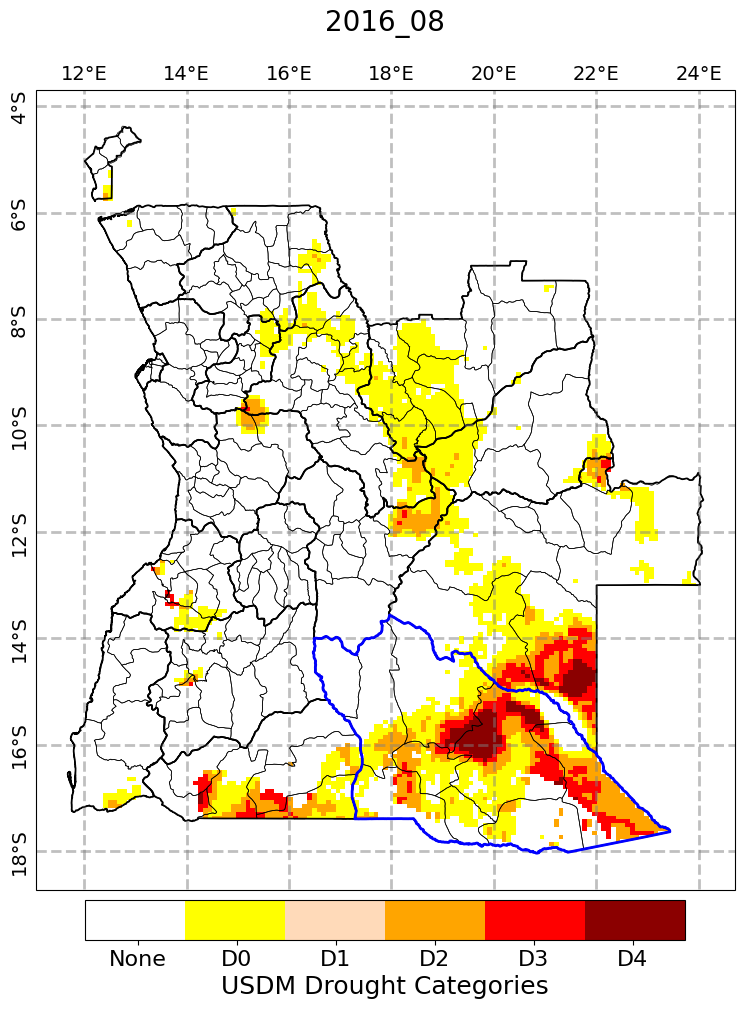

In [10]:
viz_tiff_monthly('2016_08')

Change the NAN values to -1

In [11]:
drought_labels = np.nan_to_num(drought_labels, nan=-1)
drought_labels, np.unique(drought_labels)

(array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]),
 array([-1.,  0.,  1.,  2.,  3.,  4.]))

In [12]:
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030..."
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608..."
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789..."
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7..."
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632..."
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538..."
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795..."
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216..."


In [13]:
stats = zonal_stats(shp_mun, drought_labels, affine=src.transform, categorical=True)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [14]:
stats

[{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1},
 {-1.0: 4, 0.0: 13, 1.0: 22},
 {-1.0: 14},
 {-1.0: 48},
 {-1.0: 61, 0.0: 1},
 {-1.0: 112, 0.0: 15},
 {-1.0: 82, 0.0: 1, 3.0: 2},
 {-1.0: 86},
 {-1.0: 33},
 {-1.0: 16, 0.0: 1},
 {-1.0: 14},
 {-1.0: 15},
 {-1.0: 67},
 {-1.0: 21, 0.0: 3, 1.0: 3, 2.0: 3},
 {-1.0: 106},
 {-1.0: 73},
 {-1.0: 11},
 {-1.0: 21, 0.0: 4},
 {-1.0: 26, 0.0: 8},
 {-1.0: 14},
 {-1.0: 106, 0.0: 31, 1.0: 102, 2.0: 99, 3.0: 116, 4.0: 54},
 {-1.0: 26, 0.0: 1},
 {-1.0: 52},
 {-1.0: 17, 0.0: 5, 1.0: 7, 2.0: 1},
 {-1.0: 5, 0.0: 22, 1.0: 153, 2.0: 7},
 {-1.0: 55, 0.0: 3},
 {-1.0: 16, 0.0: 3},
 {-1.0: 5},
 {-1.0: 29, 0.0: 12, 1.0: 4, 2.0: 1},
 {-1.0: 56, 0.0: 4, 1.0: 7, 2.0: 13, 3.0: 1},
 {-1.0: 112, 1.0: 1, 2.0: 6, 3.0: 10},
 {-1.0: 18, 0.0: 34, 1.0: 17},
 {-1.0: 27, 0.0: 5, 1.0: 8, 2.0: 1, 3.0: 3, 4.0: 1},
 {-1.0: 36, 0.0: 13, 1.0: 50, 2.0: 2},
 {-1.0: 43, 0.0: 20, 1.0: 31},
 {-1.0: 9, 0.0: 22, 1.0: 4},
 {-1.0: 116},
 {-1.0: 31},
 {-1.0: 62, 1.0: 2, 2.0: 1, 3.0: 1},
 {-1.0: 117, 0.0:

In [19]:
shp_mun['ADM2_EN'][20], shp_mun['ADM1_EN'][20], stats[20]

('Bundas (Lumbala-Nguimbo)',
 'Moxico',
 {-1.0: 106, 0.0: 31, 1.0: 102, 2.0: 99, 3.0: 116, 4.0: 54})

Plot the class in a province using a bar graph

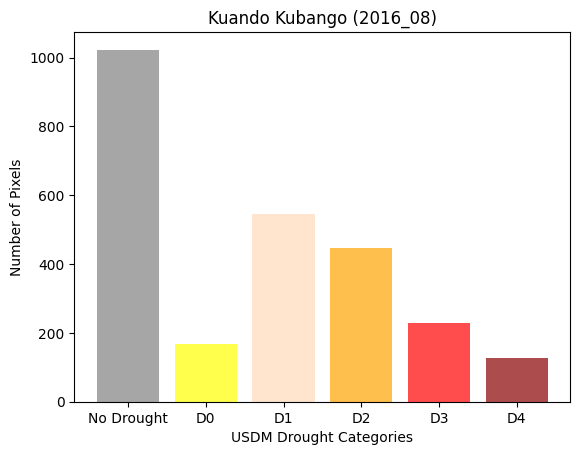

In [13]:
fig, ax = plt.subplots()

# Define the positions of the bars on the x-axis
x_pos = np.arange(6)

# Create the bars
ax.bar(x_pos, stats[4].values(), align='center', alpha=0.7, color=["gray", "yellow", "#FFDAB9", "orange","red", "darkred"])

# Add labels to the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(['No Drought','D0', 'D1', 'D2', 'D3', 'D4'])

# Add a title and labels to the axes
ax.set_title('Kuando Kubango (2016_08)')
ax.set_xlabel('USDM Drought Categories')
ax.set_ylabel('Number of Pixels')

# Save the figure
plt.savefig("../results/figures/hist_kuando_kubango_2016_08.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Plot the classes in a municipality using a bar graph

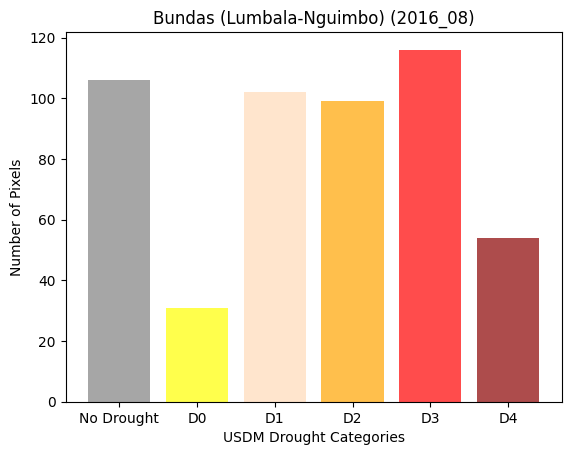

In [18]:
fig, ax = plt.subplots()

# Define the positions of the bars on the x-axis
x_pos = np.arange(6)

# Create the bars
ax.bar(x_pos, stats[20].values(), align='center', alpha=0.7, color=["gray", "yellow", "#FFDAB9", "orange","red", "darkred"])

# Add labels to the x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(['No Drought','D0', 'D1', 'D2', 'D3', 'D4'])

# Add a title and labels to the axes
ax.set_title('Bundas (Lumbala-Nguimbo) (2016_08)')
ax.set_xlabel('USDM Drought Categories')
ax.set_ylabel('Number of Pixels')

# Save the figure
plt.savefig("../results/figures/hist_Bundas_(Lumbala-Nguimbo)_2016_08.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Add the distribution of data as a column to the geodataframe.

In [20]:
shp_mun['Drought Distribution'] = stats
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}"
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}"
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14}
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48}
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16}
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19}
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9}
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195}


In [21]:
def compute_ds_index(drought_dist):
    total_pixels = sum(drought_dist.values())
    ds_index = 0
    for i, (_, v) in enumerate(drought_dist.items()):
        ds_index += i*(v/total_pixels)
    return ds_index

In [22]:
shp_mun['Drought Severity Index'] = [compute_ds_index(shp_mun['Drought Distribution'][i]) for i in range(len(shp_mun))]
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000


In [23]:
compute_ds_index(shp_mun['Drought Distribution'][5])

0.11811023622047244

In [24]:
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

In [25]:
shp_mun['Norm Drought Severity Index'] = normalize(shp_mun['Drought Severity Index'], 0, 1)
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000


<Axes: >

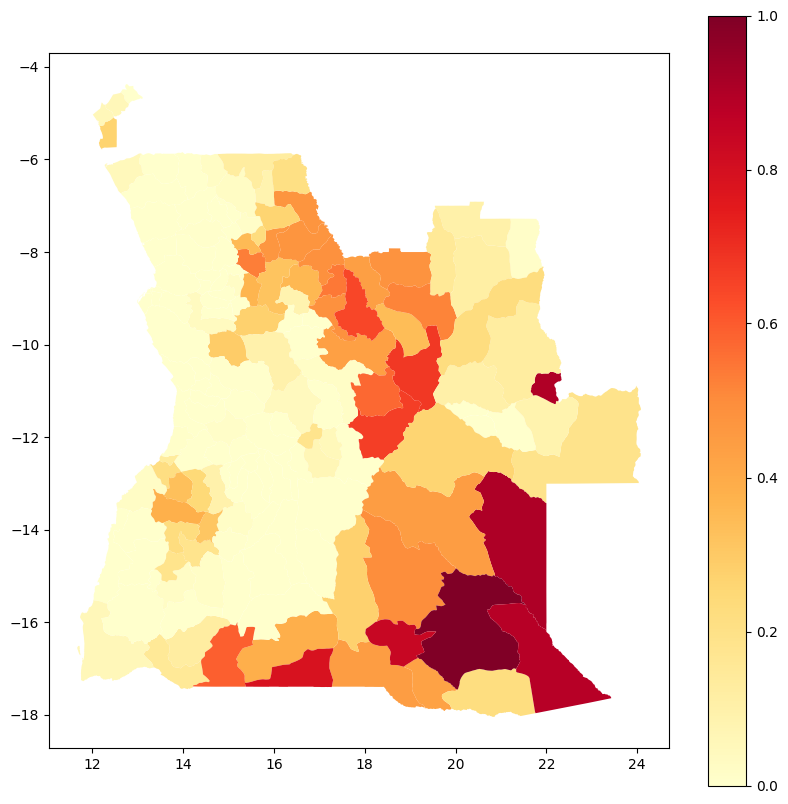

In [26]:
shp_mun.plot(column='Norm Drought Severity Index', legend=True, cmap="YlOrRd", figsize=(10, 10))

Check the distribution of the drought severity index.

(array([120.,  27.,   8.,   6.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

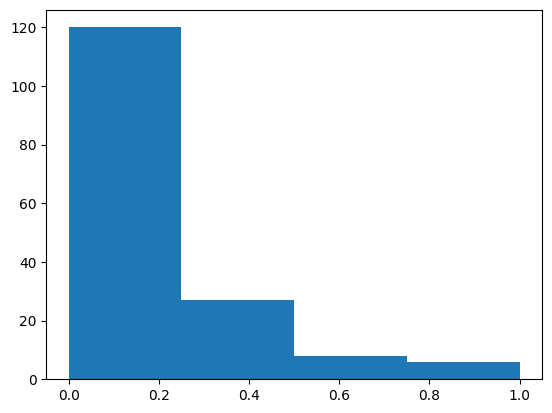

In [27]:
plt.hist(shp_mun['Norm Drought Severity Index'], bins=4)

Define the boundaries with equal intervals (0-0.25, 0.25-0.5, 0.5-0.75, 0.75-1) using `pd.cut()` function

In [28]:
shp_mun['Drought Severity Classes'] = pd.cut(shp_mun['Norm Drought Severity Index'], bins=4, labels=[0,1,2,3])
shp_mun

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415,0
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000,0
157,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000,0
158,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000,0
159,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000,0


Since the distribution is uneven, should we use the `.qcut` function?

In [ ]:
# Insert code

In [29]:
four_colors = [
    "yellow",
    "orange",
    "red",
    "darkred",
]
cmap2 = colors.ListedColormap(four_colors)

In [30]:
np.array(shp_mun['Drought Severity Classes'])

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2], dtype=int64)

**Provincial**

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_16668\2179239869.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


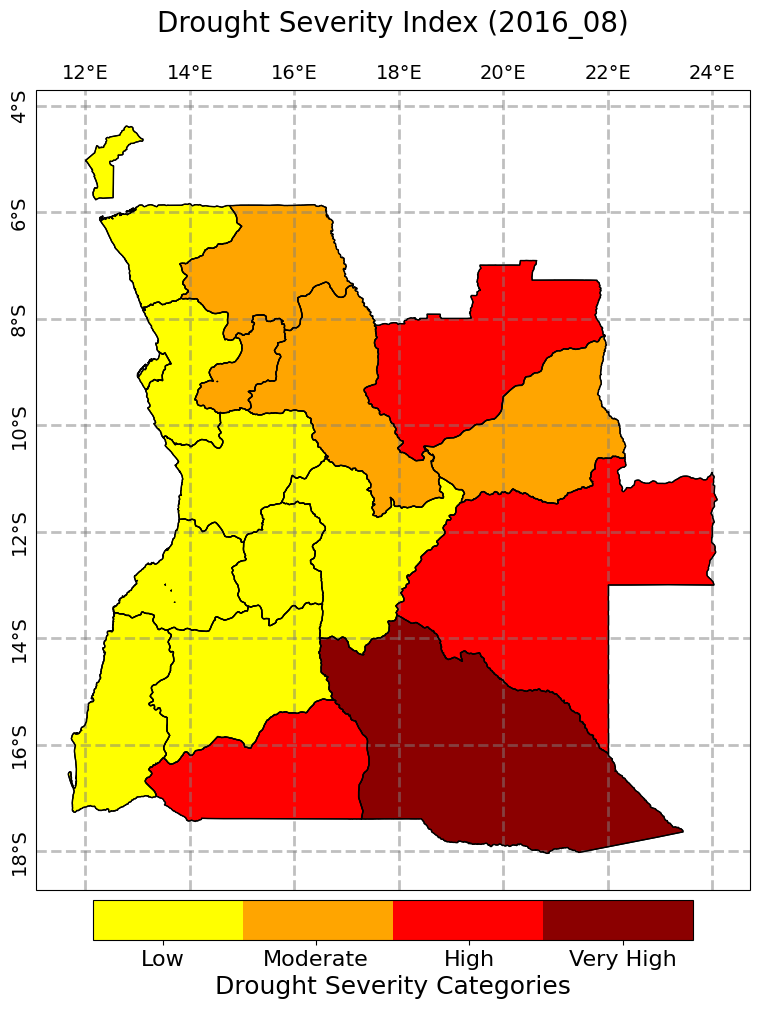

In [25]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = boundaries.plot(ax=ax, column='Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
boundaries.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Drought Severity Categories', fontsize=18)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Drought Severity Index (2016_08)', fontsize=20)

plt.savefig(f'../results/figures/ds_index_2016_08.png', dpi=300, bbox_inches='tight')

**Municipality**

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_61584\3784649728.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


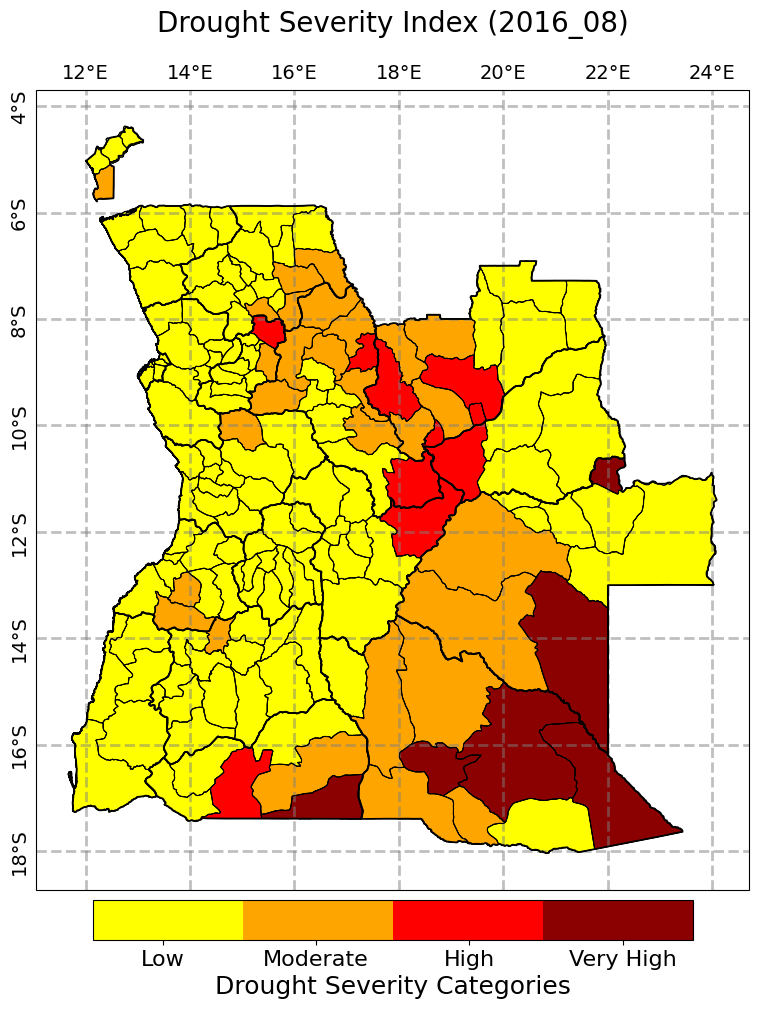

In [32]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = shp_mun.plot(ax=ax, column='Drought Severity Classes', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Drought Severity Categories', fontsize=18)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('Drought Severity Index (2016_08)', fontsize=20)

plt.savefig(f'../results/figures/mun_ds_index_2016_08.png', dpi=300, bbox_inches='tight')

Check the distribution of the drought severity index and the USDM drought category data.

In [33]:
gpd.GeoDataFrame.to_csv(shp_mun, '../results/mun_ds_index_2016_08.csv', index=False)

Let's try testing if the csv file is a compatible file type for visualizing data.

In [34]:
crs

CRS.from_epsg(4326)

In [35]:
df = pd.read_csv('../results/mun_ds_index_2016_08.csv')

df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...","{-1.0: 368, 0.0: 151, 1.0: 78, 2.0: 1}",0.518395,0.188415,0
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...","{-1.0: 4, 0.0: 13, 1.0: 22}",1.461538,0.531209,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,NaN,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",{-1.0: 48},0.000000,0.000000,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...","{-1.0: 61, 0.0: 1}",0.016129,0.005862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",{-1.0: 16},0.000000,0.000000,0
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",{-1.0: 19},0.000000,0.000000,0
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",{-1.0: 9},0.000000,0.000000,0
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",{-1.0: 195},0.000000,0.000000,0


<Axes: >

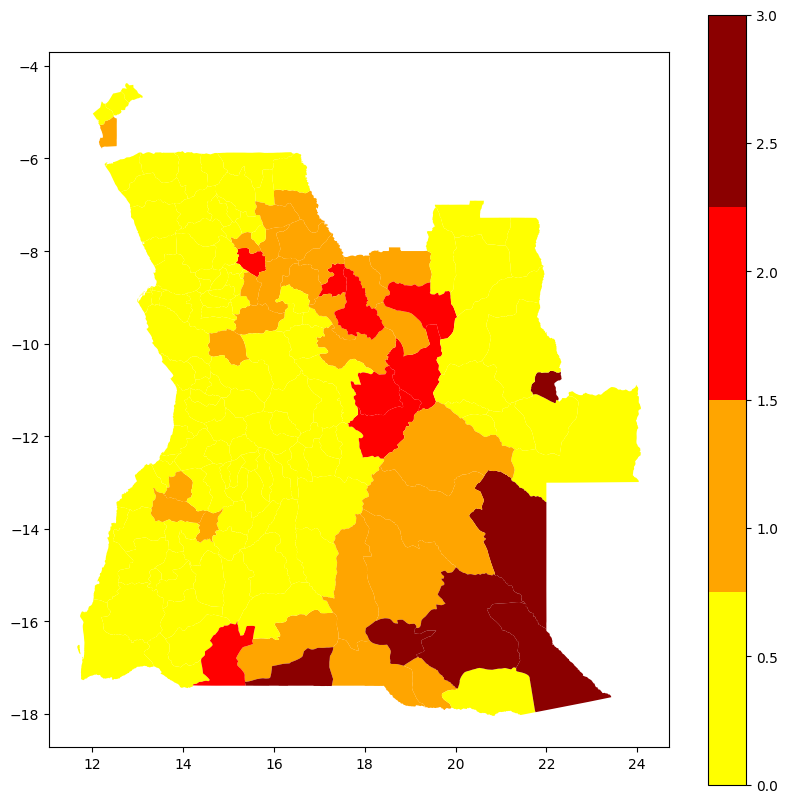

In [36]:
gdf.plot(column='Drought Severity Classes', legend=True, cmap=cmap2, figsize=(10, 10))

## Multiple Case
- Store all DS indices in a SHP file

In [37]:
import os
import time

In [48]:
def generate_ds_index(startDate, endDate, shp_path, tif_path, output_path):

    start_time = time.time()

    date_range = pd.date_range(startDate, endDate, freq='M').strftime('%Y_%m')
    boundaries = gpd.read_file(shp_path)
    boundaries = boundaries.to_crs('EPSG:4326')
    repeated_rows = [boundaries.iloc[:161]]
    output_df = pd.DataFrame()

    for date in date_range:
        print(f"Generating drought severity index in {date}...")
        tif_sample = os.path.join(tif_path, f"{date}.tif")
        with rio.open(tif_sample) as src:
            drought_labels = src.read(1)

        new_df = pd.concat(repeated_rows, ignore_index=False)

        drought_labels = np.nan_to_num(drought_labels, nan=-1)
        stats = zonal_stats(boundaries, drought_labels, affine=src.transform, categorical=True)
        new_df['Month'] = date.split('_')[1]
        new_df['Year'] = date.split('_')[0]
        new_df['Drought Distribution'] = stats
        new_df['Drought Severity Index'] = [compute_ds_index(new_df['Drought Distribution'][i]) for i in range(len(new_df))]
        new_df['Norm Drought Severity Index'] = normalize(new_df['Drought Severity Index'], 0, 1)
        new_df['Drought Severity Classes'] = pd.cut(new_df['Norm Drought Severity Index'], bins=4, labels=[0,1,2,3])
        output_df = pd.concat([output_df, new_df], ignore_index=True)
    
    output_gdf = gpd.GeoDataFrame(output_df, crs='epsg:4326')
    gpd.GeoDataFrame.to_csv(output_gdf, os.path.join(output_path, f'mun_ds_index_{date_range[0]}-{date_range[-1]}.csv'), index=False)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Script finished running in {elapsed_time:.2f} seconds")
    return output_gdf

In [49]:
shp_path = "../data/external/Angola_municipal"
raster_path = "../data/processed/monthly_drought_labels"
generate_ds_index('06/2015', '08/2015', shp_path, raster_path, '../results')

C:\Users\esl26\AppData\Local\Temp\ipykernel_61584\1366662994.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(startDate, endDate, freq='M').strftime('%Y_%m')


Generating drought severity index in 2015_06...
Generating drought severity index in 2015_07...
Script finished running in 3.09 seconds


,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,date,validOn,validTo,geometry,Month,Year,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,None,None,None,Moxico,AO15,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",06,2015,"{-1.0: 594, 0.0: 4}",0.006689,0.002066,0
1,2.398922,0.268118,Ambaca,AO06037,None,None,None,Cuanza Norte,AO06,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",06,2015,{-1.0: 39},0.000000,0.000000,0
2,1.377209,0.093426,Amboim (Gabela),AO07050,None,None,None,Cuanza Sul,AO07,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",06,2015,{-1.0: 14},0.000000,0.000000,0
3,3.202270,0.318489,Ambriz,AO01001,None,None,None,Bengo,AO01,Angola,...,2018-08-30,2018-09-04,None,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",06,2015,"{-1.0: 45, 0.0: 2, 1.0: 1}",0.083333,0.025735,0
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,None,None,Uíge,AO17,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",06,2015,{-1.0: 62},0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1.476876,0.109907,Uíge,AO17157,Uige,None,None,Uíge,AO17,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",07,2015,{-1.0: 16},0.000000,0.000000,0
318,1.811313,0.137028,Ukuma,AO10091,None,None,None,Huambo,AO10,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",07,2015,"{-1.0: 17, 0.0: 2}",0.105263,0.052012,0
319,1.067830,0.054372,Viana,AO11100,None,None,None,Luanda,AO11,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",07,2015,"{-1.0: 7, 0.0: 2}",0.222222,0.109804,0
320,5.394919,1.306706,Virei,AO16141,None,None,None,Namibe,AO16,Angola,...,2018-08-30,2018-09-04,None,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",07,2015,{-1.0: 195},0.000000,0.000000,0


In [49]:
ds_index_database.head(18)

,NAME,SHPAREASQM,CODE_PROV,geometry,Month,Year,Drought Distribution,Drought Severity Index,Norm Drought Severity Index,Drought Severity Classes
0,Bengo,3.799123e+10,1,MULTIPOLYGON (((13.123213574042353 -7.83117192...,6,2015,"{-1.0: 347, 0.0: 28, 1.0: 48, 2.0: 21, 3.0: 12...",0.730689,0.783589,3
1,Benguela,3.954707e+10,2,MULTIPOLYGON (((12.534784238961766 -13.4916427...,6,2015,"{-1.0: 463, 0.0: 22, 1.0: 13}",0.096386,0.103364,0
2,Bié,7.214479e+10,3,POLYGON ((16.51989767653864 -12.92742367173082...,6,2015,"{-1.0: 815, 0.0: 66, 1.0: 20, 2.0: 1}",0.120843,0.129591,0
3,Cabinda,6.975749e+09,4,POLYGON ((12.710993199599356 -4.46888293636067...,6,2015,"{-1.0: 79, 0.0: 8}",0.091954,0.098611,0
4,Kuando Kubango,1.997968e+11,5,POLYGON ((22.23645770750285 -16.57306174104963...,6,2015,"{-1.0: 2284, 0.0: 214, 1.0: 43}",0.118064,0.126611,0
5,Kwanza Norte,2.029464e+10,6,POLYGON ((14.54236897824651 -9.779219217157618...,6,2015,"{-1.0: 95, 0.0: 70, 1.0: 65, 2.0: 7}",0.932489,1.000000,3
6,Kwanza Sul,5.539526e+10,7,POLYGON ((15.265107022513641 -9.79955862916119...,6,2015,"{-1.0: 638, 0.0: 22, 1.0: 13, 2.0: 16, 3.0: 2}",0.150507,0.161403,0
7,Kunene,7.735317e+10,8,POLYGON ((16.29436583392417 -17.38977939316112...,6,2015,"{-1.0: 502, 0.0: 282, 1.0: 190, 2.0: 11}",0.705584,0.756667,3
8,Huambo,3.318300e+10,9,POLYGON ((16.326048224004246 -11.6063930098840...,6,2015,"{-1.0: 364, 0.0: 34, 1.0: 14}",0.150485,0.161380,0
9,Huíla,7.874020e+10,10,POLYGON ((15.544721335623244 -13.7605203603804...,6,2015,"{-1.0: 496, 0.0: 231, 1.0: 200, 2.0: 69}",0.841365,0.902279,3


(array([75.,  0.,  0., 15.,  0.,  0.,  5.,  0.,  0.,  7.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

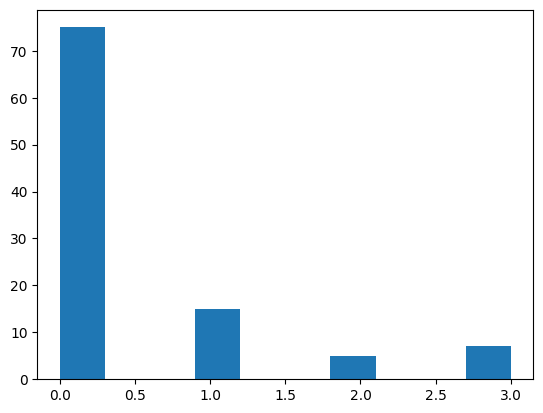

In [52]:
ds_index_database = pd.read_csv('../results/mun_ds_index_2015_06-2023_11.csv')
plt.hist(ds_index_database.loc[ds_index_database['ADM2_EN'] == 'Bundas (Lumbala-Nguimbo)']['Drought Severity Classes'])